# Import Modules
You may need to install some of them.

In [43]:
using Revise, DeconvOptim, TestImages, Colors, Noise, ImageShow, FFTW, OffsetArrays

In [44]:
img = convert(Array{Float32}, testimage("simple_3d_ball"))
psf = permutedims(ifftshift(OffsetArrays.no_offset_view(
            Float32.(testimage("simple_3d_psf")))), (3,1,2))
psf ./= sum(psf)
# create a blurred, noisy version of that image
img_b = conv(img, psf, [1, 2, 3])
img_n = poisson(img_b, 300);

In [45]:
# the regularizer must be now adapted since we want to have
# a 3D one
reg1 = TV(num_dims=3, sum_dims=[1, 2, 3])
reg2 = Tikhonov(num_dims=3, sum_dims=[1, 2, 3])

#76 (generic function with 1 method)

In [49]:
@time res, ores = deconvolution(img_n, psf, regularizer=reg1, loss=Poisson(),
                          λ=0.02, padding=0.2, iterations=6);
@time res2, ores = deconvolution(img_n, psf, regularizer=reg2, loss=Poisson(),
                          λ=0.001, padding=0.0, iterations=6);

  0.658033 seconds (13.77 k allocations: 1.114 GiB, 18.85% gc time)
  0.198081 seconds (12.00 k allocations: 405.765 MiB, 16.50% gc time)


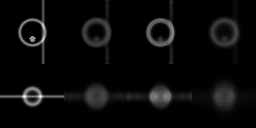

In [47]:
img_comb1 = [img[32, :, :] res2[32, :, :] res[32, :, :] img_n[32, :, :]]
img_comb2 = [img[:, : ,43] res2[:, :, 43] res[:, :, 43] img_n[:, :, 43]]

img_comb = cat(img_comb1, img_comb2, dims=1)
img_comb ./= maximum(img_comb)

Gray.(img_comb)